# Learning Best Practices for Model Evaluation and Hyperparameter Tuning

## Loading the Breast Cancer Wisconsin dataset

The following example uses Logistic Regression to classify the breast cancer dataset. The label column is "diagnosis", with `M` represents malignat(惡性) and `B` represents benign(良性). 



In [1]:
import numpy as np
import pandas as pd
threshold = 0.6
df = pd.read_csv('./breast_cancer_data.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
# convert label M/B => 1/0
mapping_dictionary = {'diagnosis':{'M': 1, 'B': 0}}
df = df.replace(mapping_dictionary)
# check if there is missing value
df.isnull().sum()  # => no missing value

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [3]:
# drop the first column, patient id
df = df.drop('id', axis = 1)
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Check data is legal for sklearn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

## Combining transformers and estimators in a pipeline
Pipeline is 

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
train_X, train_Y = df_train.iloc[:, 1:].values.astype(np.float64), df_train.iloc[:, 0].values.astype(np.float64)
test_X, test_Y = df_test.iloc[:, 1:].values.astype(np.float64), df_test.iloc[:, 0].values.astype(np.float64)


clf = Pipeline([('scl', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('clf', LogisticRegression(random_state=1))])

clf.fit(train_X, train_Y)
y_pred = clf.predict(test_X)
print("Test Accuracy: {:.3f}".format(accuracy_score(test_Y, y_pred)))

Test Accuracy: 0.947


本次作業目的為說明 regression model 也可以作為 classification model 使用，透過一個可變的門檻值把模型輸出分為兩類。

![regression model](https://qph.fs.quoracdn.net/main-qimg-914b29e777e78b44b67246b66a4d6d71)

我們以一個 Linear Regression 模型作為示範，模型輸入為 data 的各項 feature，輸出為一個浮點數值。
在 training 階段，和 classification model 相比最大的差異在於 label 此時是 0. 或者 1.，不是單純的整數，可以預期在 prediction 階段模型輸出會是一系列的浮點數。


<img src="https://ppt.cc/ffYNvx@.png" alt="Drawing" style="width: 200px;"/>

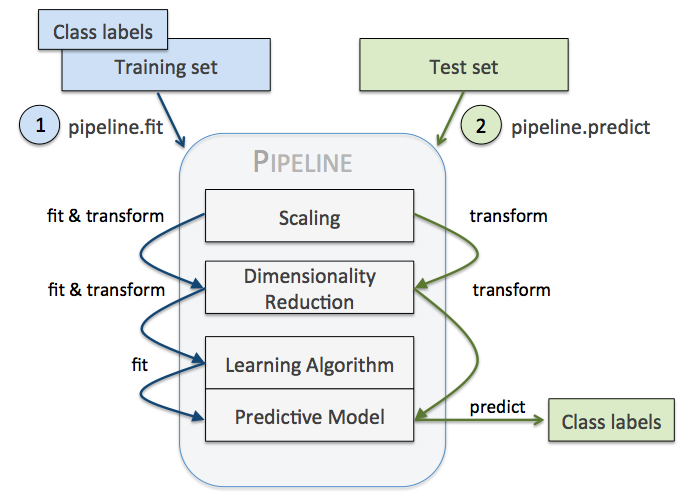

# Exercise2 - Build a regressor on stock data (predict a stock price)

- Load the data in the stock directory.
- Choose a regressor in sklearn package(SVR, decision tree, KNN, MLP, etc.)
- Make the predictions on test data and report the results.
- Raw data is in "/home/mlb/res/stock/twse/raw/"  or json data is in "/home/mlb/res/stock/twse/json/"
- Feature set consists of thirty features(six features each day, high price, low price, open price, close price, adjust close, volume).

In [ ]:
stock_train_X = np.load('stock/train_X.npy') # train 2017-05-01 ~ 2017-05-31
stock_train_Y = np.load('stock/train_Y.npy')
stock_test_X = np.load('stock/test_X.npy') # test 2017-06-01 ~ 2017-06-30
stock_test_Y = np.load('stock/test_Y.npy')

# [Reference to python-machine-learning-book ch6](https://github.com/rasbt/python-machine-learning-book) 